In [1]:
import pandas as pd
import darts
from darts.models.forecasting.nbeats import NBEATSModel

In [2]:
df = pd.read_csv("../darts/datasets/AirPassengers.csv")

In [3]:
from darts import TimeSeries

series = TimeSeries.from_dataframe(df, "Month", "#Passengers")

In [4]:
train, val = series.split_after(pd.Timestamp("19591231"))

In [5]:
model = NBEATSModel(input_chunk_length=7, output_chunk_length=1)

In [6]:
model.fit(train, val_series=val, setup_only=True, verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [7]:
lr_finder = model.lr_find()

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 80 steps due to diverging loss.
Restoring states from the checkpoint path at /home/alatus/code/darts_test/.lr_find_57993a9a-1563-4bfe-ac05-90dd4e778bde.ckpt
Restored all states from the checkpoint file at /home/alatus/code/darts_test/.lr_find_57993a9a-1563-4bfe-ac05-90dd4e778bde.ckpt


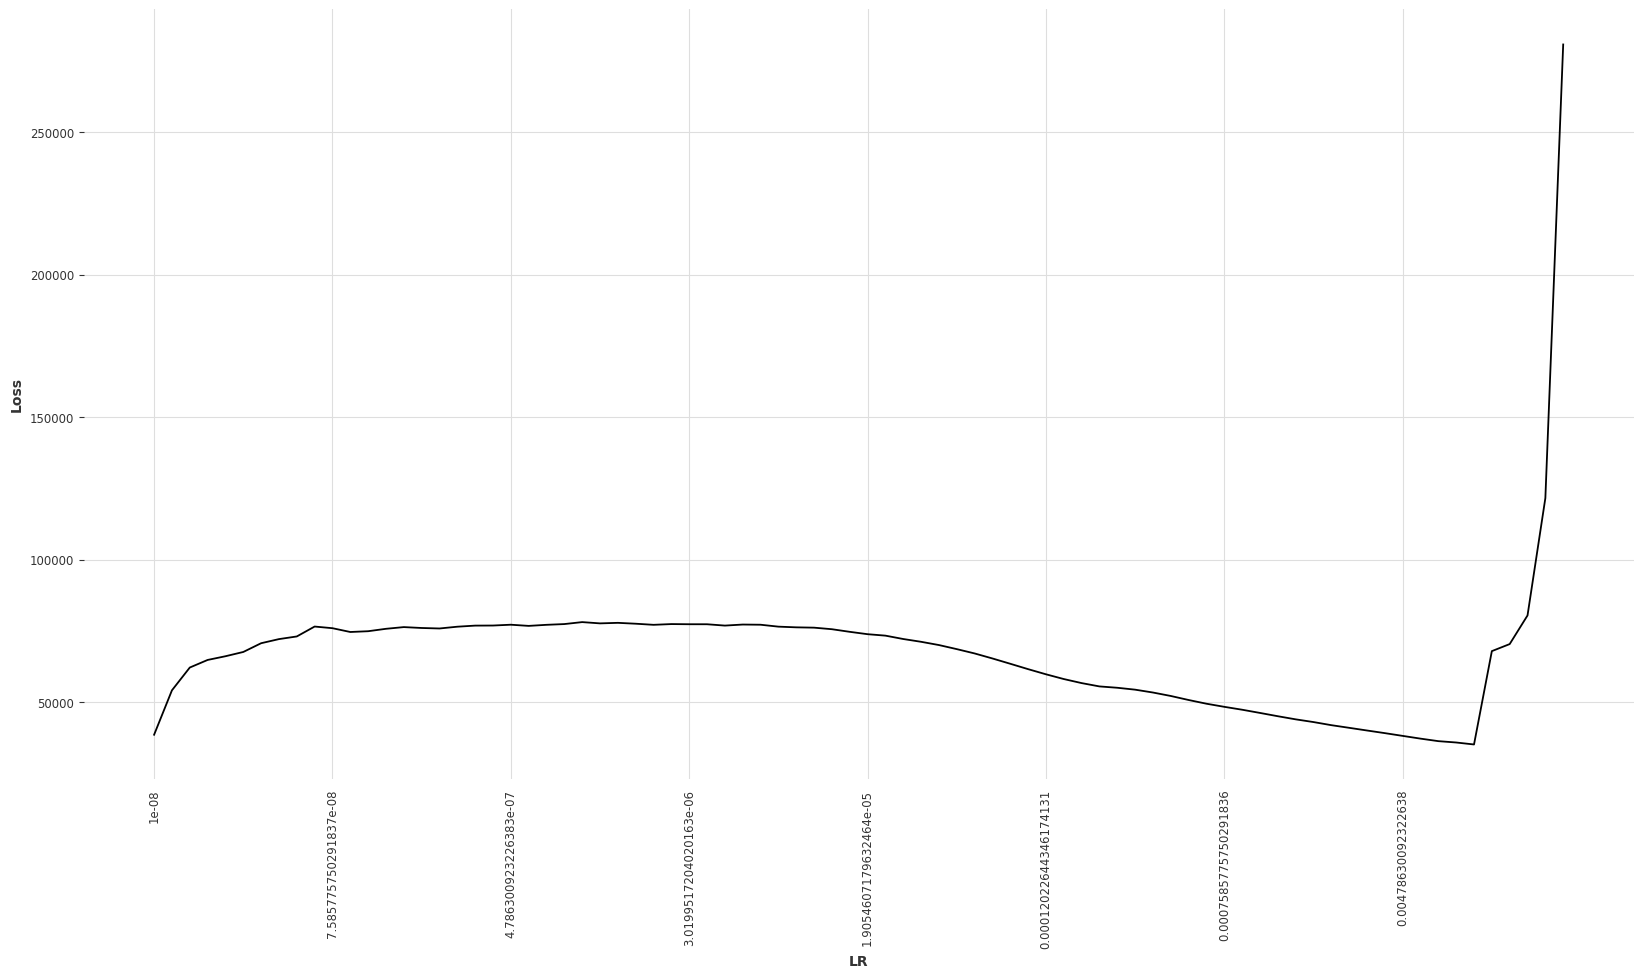

In [10]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(lr_finder.results["loss"])

plt.xticks(
    list(range(len(lr_finder.results["loss"])))[0::10],
    lr_finder.results["lr"][0::10],
    rotation=90,
)
plt.xlabel("LR")
plt.ylabel("Loss")

plt.show()